# Day 12 - 머신러닝(4)

## 혼동행렬

- 모델이 예측한 값과 실제 값을 교차 표 형태로 정리한 행렬
    - Accuracy: 정확도 (분석가들은 정확도를 잘 안씀 신뢰가 없음)
    - Specificity: 특이도
        - 실제 neagtive값 중에서 모델이 예측한 비율
    - Recall, Sensitivity, TPR: 민감도
        - 실제 positive값 중에서 모델이 예측한 비율
    - Precision: 정밀도

    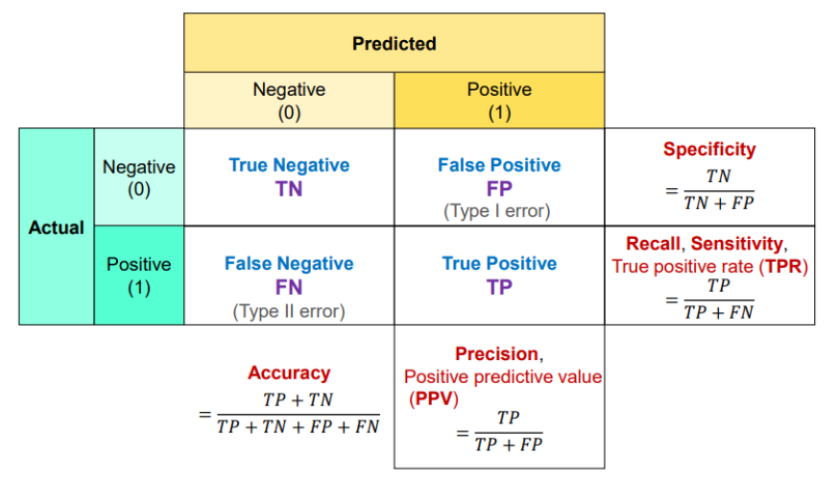
    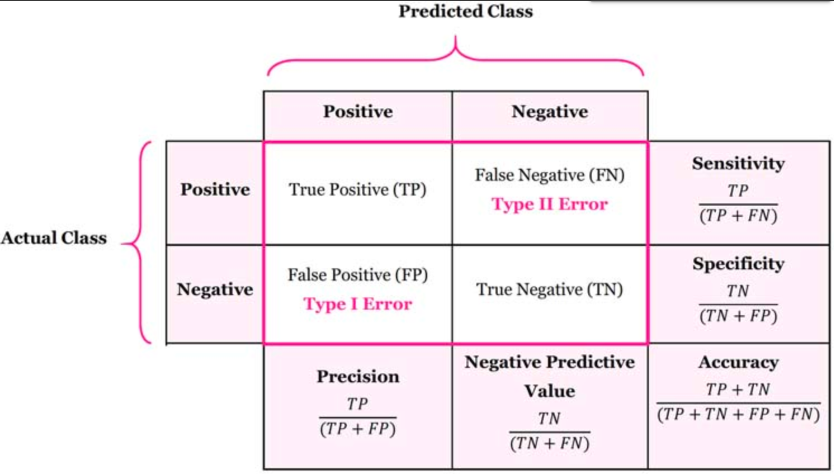

- TP / TN / FP / FN
    - TP(True Positive)
        > 참긍정.   
        > 병에 관해 예라고 예측한 환자가 실제 병을 가진 경우
    - TN(True Negative)
        > 참부정.  
        > 병에 관해 아니오라고 예측한 환자가 실제로 병이 없는 경우
    - FP(False Positive)
        > 거짓긍정.  
        > 병에 관해 예라고 예측한 환자가 실제로는 병이 없는 경우  
    - FN(False Negative)
        > 거짓부정.  
        >병에 관해 아니오라고 예측한 환자가 실제로는 병이 있는 경우

- digits datasets sklearn - 분류모델


In [7]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits

digits = load_digits()

In [8]:
digits.data.shape # 1797의 데이터 / 이미지 크기는 64

(1797, 64)

In [10]:
digits.target.shape

(1797,)

In [12]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
digits.target[0]

0

In [14]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
data = digits.data

# Binary Classifier 이진분류
target = (digits.target == 5).astype(int)

In [16]:
target5 = digits.target[:5]
target5

array([0, 1, 2, 3, 4])

In [17]:
(target5 == 3) # 3이면 참이다.

array([False, False, False,  True, False])

In [18]:
(target5 == 3).astype(int) #false = 0 / true = 1

array([0, 0, 0, 1, 0])

In [4]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_valid, y_train, y_valid = train_test_split(data, target, random_state=SEED)

x_train.shape , x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

In [5]:
# 원본 데이터
digit = data[5]
digits.target[5]

5

In [19]:
# 변경한 데이터터
target[5] # target 5니까 true 1

1

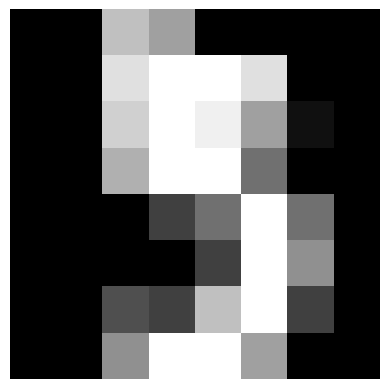

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

# 벡터 변환
digit_img = digit.reshape(8, 8)

plt.imshow(digit_img, cmap="gray") #imshow - image show / cmap - 색
plt.axis("off") # 축을 off
plt.show() # 그림을 보여줘라
# 8 *8의 이미지가 나옴

***
## Modeling
- 모델 정리 학습 예측
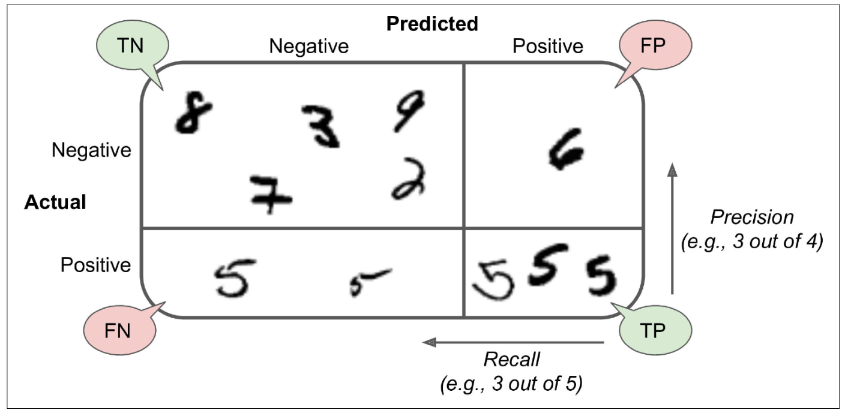

Accuracy
- DummyClassifier : 특정전략을 작성하면 그거에 맞게 <br>
        - most_frequent <br>
            - 가장 많은걸로 찍는것 (10개 중에 1개만 1일경우, 0이 더 많으니까 0으로 예측/ 값 상관없이)<br>
- SGDClassifier : 진짜 모델로 학습 (모델 파라미터를 바꿔가면서)<br>

F1 Score<br>
- Precision(정밀도)과 Recall(재현도)으로 F1 Score가 구성되고 불균형한 데이터가 잘 동작하는지에 대한 평가지표<br>
- 정밀도와 민감도 사이값
<br>
$$
F1-Score = { 2 * Presicion * Recall \over Precision + Recall }
$$   

classification_report : 전체적으로 학습이 잘 되어있는지 확인가능

Precision-Recall Trade-off ★
- 둘 중하나가 올라가면 나머지는 내려간다.
- 확률값 기준으로 true, false를 주는게 기본
- 임계값 기준으로 
    - precision(true라는 예측값에서 실제를 맞춘값), 
    - recall(전체 실제값에서 전체값)이 달라진다.
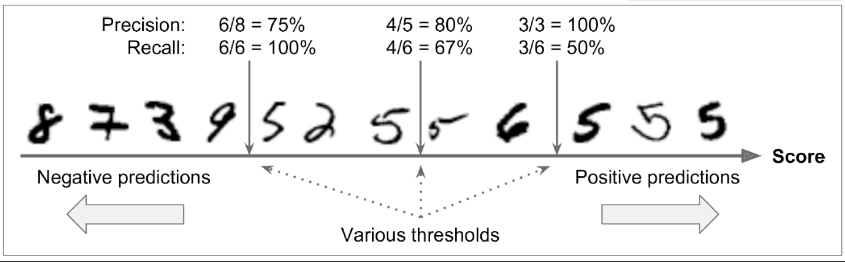<br>

- 임계값
(마지막 단계에서 사용 / 중간에 사용하면 문제발생)
```py
pred_proba = sgd_clf.decision_function(x_valid) #예측_확률값
```
```py
threshold = 0 # 사이킷런의 디폴트값
pred = np.where(pred_proba > threshold , 1 , 0) 
# 조건 / 앞에조건에 따라 참이면 1, 거짓이면 0

precision_score(y_valid,pred) , recall_score(y_valid,pred)
```
- DecisionTreeClassifier
```py
pred_proba = tree.predict_proba(x_valid)[:,1]
```

In [26]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

sgd_clf.predict([digit])

array([0])

In [27]:
from sklearn.model_selection import cross_val_predict # 교차검증

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=5)

In [24]:
from sklearn.metrics import confusion_matrix


In [28]:
conf_mx = confusion_matrix(y_train, y_train_pred) # 실제값 / 예측값
conf_mx

array([[1217,    7],
       [   8,  115]], dtype=int64)

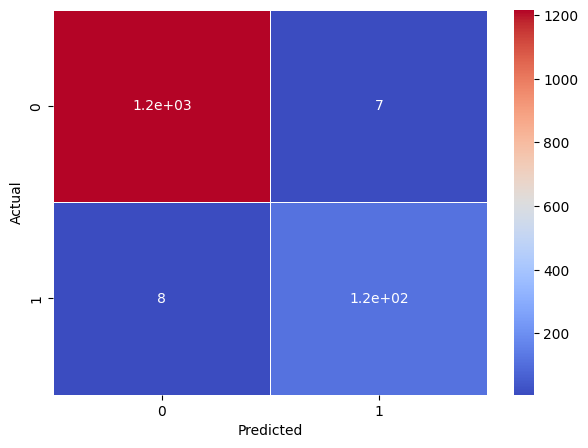

In [29]:
plt.figure(figsize=(7,5))

sns.heatmap(conf_mx, annot=True, cmap="coolwarm", linewidth=0.5)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
norm_conf_mx = confusion_matrix(y_train, y_train_pred, normalize="true") 
# normalize = True로 넣어주면 %로 보여준다
norm_conf_mx

array([[0.99428105, 0.00571895],
       [0.06504065, 0.93495935]])

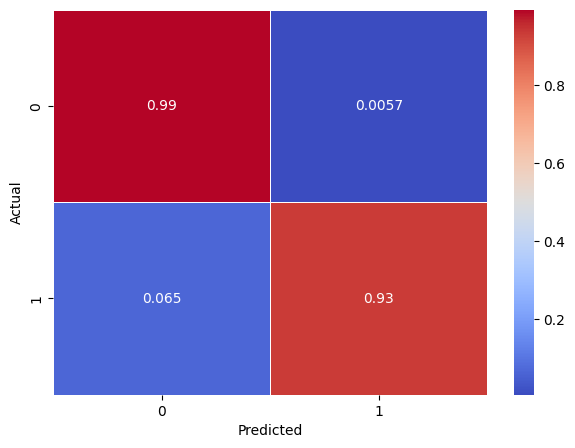

In [31]:
# 분류모델에 필수
plt.figure(figsize=(7,5))

sns.heatmap(norm_conf_mx, annot=True, cmap="coolwarm", linewidth=0.5)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

위 heatmap 설명
- 모델 예측값이 0인데, 실제값actual이 0이면 true인데 0은 neagative이니까 TN
- 모델 예측값이 1인데, 실제값actual이 0이면 false인데 1은 positive이니까 FP

***
## 이진분류 모형

- ROC curve(Receiver Operating Characteristic curve)평가지표
    - FPR : 실제 negative 중에서 모델이 틀린 것
    - TPR : 실제 positive 중에서 모델이 맞춘 것
    - FPR x축/ TPR  y축으로 만든 것

- AUROC (Area Under ROC curve)
    - roc커브의 아래쪽 면적(roc커브를 그리고 auc구하기)
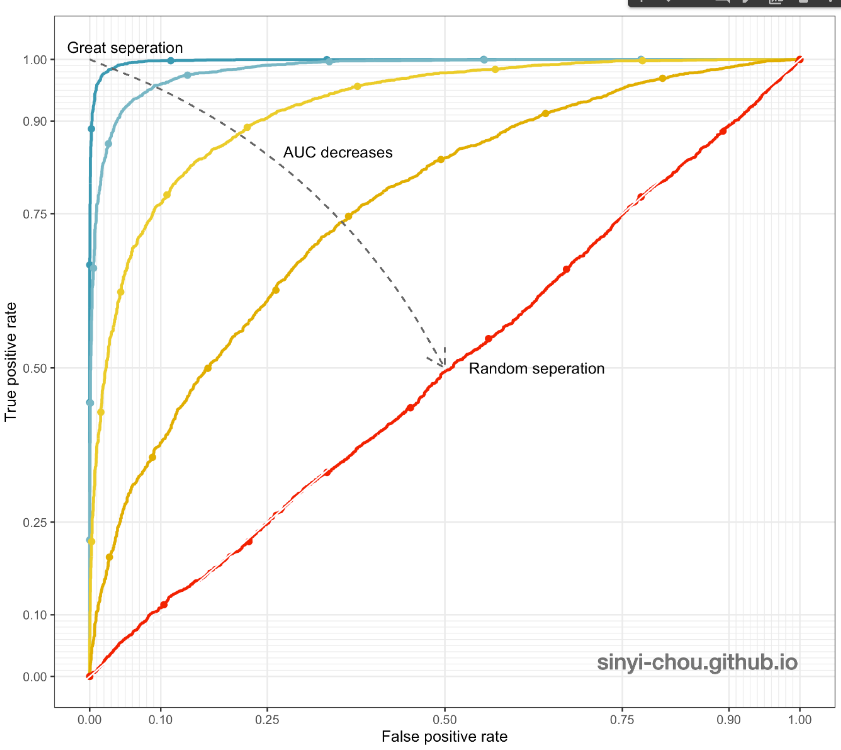
90도로 그려지면 1, 아래로 내려갈수록 낮아짐

- Threshold는 기울기값



***
## 다중분류 모형
- 딥러닝 사용
#### classification_report
print(classification_report(y_valid,pred))

#### confusion_matrix
norm_conf_mx = confusion_matrix(y_valid, pred, normalize="true")
norm_conf_mx

#### Multi Classification 분류 방법
- 소프트맥스 함수(Softmax Function)
    - 모든 클래스(멀티 클래스)들의 확률값을 출력
    - 모델은 학습을 하면 실수가 나오는데 실수를 가지고 해석을 할 수 없다. => 결측치를 확률값으로 변경
    - 모델이 학습한 결과를 실수로 표기해주므로 확률값으로 바꿔주고 해석을 한다.
    - 그래프로 비율을 나타내준다.